In [1]:
#irr
import mxnet 
from mxnet.gluon import nn
from mxnet import gluon, image, np, npx
import matplotlib.pyplot as plt
import numpy
from mxnet.gluon.data.vision import transforms
import cv2
from PIL import Image
from mxnet.gluon.model_zoo import vision
import os
import pandas as pd
from d2l import mxnet as d2l
from mxnet.gluon import nn
from mxnet import init
npx.set_np()

In [2]:
#irr
def try_gpu(i=0):
    """Return gpu(i) if exists, otherwise return cpu()."""
    return npx.gpu(i) if npx.num_gpus() >= i + 1 else npx.cpu()

def try_all_gpus():
    """Return all available GPUs, or [cpu()] if no GPU exists."""
    devices = [npx.gpu(i) for i in range(npx.num_gpus())]
    return devices if devices else [npx.cpu()]

device = try_gpu()
ctx = npx.cpu()
all_device = try_all_gpus()

In [3]:
def read_dataset():
    data = pd.read_csv('json_to_csv_with_address.csv')
    x=data.loc[:,['image_address','image_name']]
    x=x.drop_duplicates()
    img_real = [cv2.imread(item) for item in x['image_address']]
    img_real = [cv2.cvtColor(item, cv2.COLOR_BGR2RGB) for item in img_real]
    
    y = data.loc[:,['ymin','xmin','ymax','xmax','label']]
    boxes = dict({item:[] for item in x['image_name']})
    
    for i,name in enumerate(data['image_name']):
        boxes[name].append([y.loc[i]])

    
    return img_real,x, boxes

In [4]:
#irr
data = pd.read_csv('json_to_csv_with_address.csv')
z = data['label'].drop_duplicates()
label_id = dict({item:i+1 for i,item in enumerate(z)})

label_name = []
for item in z:
    label_name.append(item)
num_labels = len(label_name)

In [5]:
#label_id['background'],label_name[0], num_labels

In [6]:
def return_bbox_with_label(x,name):
    temp = x[name]
    lst = []
    label = []
    for i in temp:
        for j in i:
            lst.append([j[0],j[1],j[2],j[3]])
            label.append(j[4])
    return lst,label
    
    

In [7]:
def plot_im_box(im,box,label=None):
    image = im.copy()
    color = [(255,0,0),(0,255,0),(0,0,255),(255,255,0),(255,0,255),(0,255,255)]
    for j,i in enumerate(box):
        thickness= 2

        image = cv2.rectangle(image, (int(i[1]),int(i[0])) ,(int(i[3]),int(i[2])), color[j%len(color)], thickness)
        if label!=None:
            cv2.putText(image, text= label[j], org=(int(i[1]),int(i[0])),
                    fontFace= cv2.FONT_HERSHEY_SIMPLEX, fontScale=1.5, color=(255,255,255),
                    thickness=2, lineType=cv2.LINE_AA)
    #cv2.imshow(window_name, image)
    return plt.imshow(image)

In [8]:
def box_iou(boxes1, boxes2):
    """Compute IOU between two sets of boxes of shape (N,4) and (M,4)."""
    # Compute box areas
    box_area = lambda boxes: ((boxes[:, 2] - boxes[:, 0]) *
                              (boxes[:, 3] - boxes[:, 1]))
    area1 = box_area(boxes1)
    area2 = box_area(boxes2)
    lt = np.maximum(boxes1[:, None, :2], boxes2[:, :2])  # [N,M,2]
    rb = np.minimum(boxes1[:, None, 2:], boxes2[:, 2:])  # [N,M,2]
    wh = (rb - lt).clip(min=0)  # [N,M,2]
    inter = wh[:, :, 0] * wh[:, :, 1]  # [N,M]
    unioun = area1[:, None] + area2 - inter
    return inter / unioun

In [ ]:
def softmax(X):
    X_exp = np.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition # The broadcasting mechanism is applied here

In [9]:
#irr
im,x, b = read_dataset()     #im for image used in cv2.rect, b for dictionary of {image_name:[bbox,label]}, x for df of [locn,im_name]
img = np.array(im, dtype= np.float32) #dummy of im


In [10]:
#box,l = return_bbox_with_label(b,x['image_name'][0])

count = 0
for i in range(len(im)):
    print(im[i].shape, x['image_name'][i], return_bbox_with_label(b,x['image_name'][i]))
    fig=plt.imshow(im[i])
    bbox
    break
    

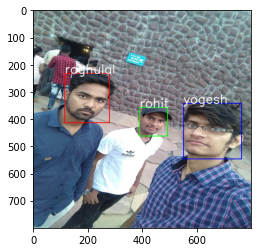

In [11]:
#irr visual
j=0  #it can be 0 to 130 only  box = list of bbox, l = label of bbox
box,l = return_bbox_with_label(b,x['image_name'][x.index[j]])
plot_im_box(im[j],box,l)

In [12]:
#l,box

In [13]:
#irr
model = vision.vgg16(pretrained=True )    #pretrained vgg16 model 
fe = list(model.features)
print(len(fe))

35


In [14]:
#irr
dummy_img = np.zeros((1,3,800,800), dtype = np.float32)   #for checking 
print(dummy_img.shape)

(1, 3, 800, 800)


In [15]:
#irr
k= np.array(dummy_img , dtype= np.float32)
req_features=[]
for i in fe:
    k= i(k)
    if k.shape[2]<800//16:
        break
    req_features.append(i)
    out_channels = k.shape[1]
print(len(req_features))
print(out_channels)

30
512


# main job from here img

In [16]:
#irr looping and start respective
j=0  #it can be 0 to 130 only  box = list of bbox, l = label of bbox
box,l = return_bbox_with_label(b,x['image_name'][x.index[j]])
bbox = np.array(box, dtype= np.float32)
label_l = l   #list of label names
label_s = [label_id[item] for item in l]   #list of label id's
labels = np.array(label_s, dtype= np.int32)  #np array of label id's
sub_sample = 16       #1 bit in feature map of out_channels corresponds to 16*16 of raw

In [17]:
print(bbox, l, labels)

[[232.05084 116.44068 413.40677 280.     ]
 [357.47458 391.01694 462.55933 493.55933]
 [342.22034 552.0339  546.45764 765.5932 ]] ['raghulal', 'rohit', 'yogesh'] [1 2 3]


In [18]:
#resp 
img0= img[j]
transform = transforms.Compose([transforms.ToTensor()])
#imgTensor= transform(img0)
imgTensor = np.expand_dims(transform(img0),axis=0)
print(imgTensor.shape)
net = nn.Sequential()
with net.name_scope():
    for x in req_features:
        net.add(x)


(1, 3, 800, 800)


In [19]:
print(img0.dtype, imgTensor.mean(), imgTensor.shape )

float32 0.50089604 (1, 3, 800, 800)


In [20]:
#resp
out_map=net(imgTensor)
out_map.shape

(1, 512, 50, 50)

In [21]:
print(out_map[0,397].max() )

5.2067585


In [22]:
#plt.imshow(out_map[0,397].asnumpy())

#temporary remove
label_l=l

In [23]:
#irr
ratios= [0.5,1,2]
anchor_scales=[8,16,32]
ctr_y = sub_sample/ 2.
ctr_x = sub_sample/ 2.

#anchor_base= np.zeros((len(ratios)*len(anchor_scales),4), dtype=np.float32)
#print(anchor_base)

In [24]:
#irr
fe_size = 800//16
sub_sample = 16 
ctr_x = np.arange(sub_sample, (fe_size+1)*sub_sample, sub_sample)
ctr_y = np.arange(sub_sample, (fe_size+1)*sub_sample, sub_sample)

ctr = np.empty((len(ctr_x)*len(ctr_y),2), dtype = np.int32)
index = 0 
for x in range(len(ctr_x)):
    for y in range(len(ctr_y)):
        ctr[index,1]= ctr_x[x] - 8
        ctr[index,0]= ctr_y[y] - 8
        index +=1
        

In [25]:
print(ctr.dtype, ctr.shape)

int32 (2500, 2)


In [26]:
#irr
index = 0 
anchors = np.zeros(((fe_size*fe_size*9),4))
for c in ctr:
    ctr_y, ctr_x = c
    for i in range(len(ratios)):
        for j in range(len(anchor_scales)):
            h = sub_sample * anchor_scales[j]* np.sqrt(ratios[i])
            w = sub_sample * anchor_scales[j]* np.sqrt(1./ratios[i])
            
            anchors[index, 0] = ctr_y - h/2
            anchors[index, 1] = ctr_x - w/2
            anchors[index, 2] = ctr_y + h/2
            anchors[index, 3] = ctr_x + w/2
            index +=1
            
print(anchors.shape)


(22500, 4)


In [27]:
#irr
anchor_boxes = anchors

In [28]:
print(anchor_boxes.shape)

(22500, 4)


In [29]:
#irr
index_inside = np.where(
        (anchor_boxes[:, 0] >= 0) &
        (anchor_boxes[:, 1] >= 0) &
        (anchor_boxes[:, 2] <= 800) &
        (anchor_boxes[:, 3] <= 800)
    )[0]
print(index_inside.shape)

valid_anchor_boxes = anchor_boxes[index_inside]
print(valid_anchor_boxes.shape)

(8940,)
(8940, 4)


In [30]:
#resp 
ious = np.zeros((len(valid_anchor_boxes), len(bbox)), dtype=np.float32)
ious = box_iou(valid_anchor_boxes,bbox)
#ious.shape, ious.max(axis =0)


In [31]:
#resp
gt_argmax_ious_row = ious.argmax(axis=0)


gt_max_ious = ious[gt_argmax_ious_row, np.arange(ious.shape[1])]


gt_argmax_ious = np.where(ious == gt_max_ious)[0]


In [32]:
print(gt_argmax_ious_row)
print(gt_max_ious)
print(gt_argmax_ious)

[1138 5143 8166]
[0.55234814 0.6576929  0.66553926]
[1138 1144 1150 1366 1372 1378 1594 1600 1606 5143 8166 8171 8176 8352
 8357 8362]


In [33]:
#np.where(np.array([3,4])==np.array([2,4]))[0]

In [34]:
#res
argmax_ious = ious.argmax(axis=1)
max_ious = ious[np.arange(len(index_inside)), argmax_ious]


In [35]:
print(argmax_ious.shape)
print(argmax_ious.max())
print(max_ious.max())

(8940,)
2
0.66553926


In [36]:
#res
label = np.zeros((len(index_inside), ), dtype=np.int32)-1
print(label.mean(), label.shape)

-1.0 (8940,)


In [37]:
#res
pos_iou_threshold  = 0.7
neg_iou_threshold = 0.3
label[gt_argmax_ious] = 1
label[max_ious >= pos_iou_threshold] = 1
label[max_ious < neg_iou_threshold] = 0

In [38]:
print(label.shape, label.max())

(8940,) 1


In [39]:
#res
n_sample = 256
pos_ratio = .5
n_pos = int(pos_ratio * n_sample)

pos_index = np.where(label == 1)[0]

if len(pos_index)>n_pos:
    disable_index = np.random.choice(pos_index, 
                                     size = (len(pos_index) - n_pos), 
                                     replace = False)
    label[disable_index] = -1
    
n_neg =int( n_sample * np.sum(label == 1))
neg_index =np.where(label==0)[0]
#neg_index = np.array(np.where(label == 0), dtype= np.int64).reshape(-1,1)
if len(neg_index)> n_neg:
    disable_index = np.random.choice(neg_index, size= (len(neg_index) - (n_neg)), replace = False)
    label[disable_index]=-1
    #print(disable_index.shape)
#print(np.array(neg_index, dtype = np.int64).shape)

In [40]:
#print(np.array(neg_index, dtype = np.int64).shape)
print((label==1).sum()), pos_index[0]

16


(None, array(1138, dtype=int64))

In [41]:
#res
max_iou_bbox = bbox[argmax_ious]      # associativity of anchor to its corresponding ground truth bbox
#print(max_iou_bbox.shape)

height = valid_anchor_boxes[:,2] - valid_anchor_boxes[:,0]
width = valid_anchor_boxes[:,3] - valid_anchor_boxes[:,1]
ctr_y = valid_anchor_boxes[:,0]+ 0.5*height
ctr_y = valid_anchor_boxes[:,1]+ 0.5*width

base_height = max_iou_bbox[:,2] - max_iou_bbox[:,0]
base_width = max_iou_bbox[:,3] - max_iou_bbox[:,1]
base_ctr_y = max_iou_bbox[:,0] + 0.5*base_height
base_ctr_x = max_iou_bbox[:,1] + 0.5*base_width

eps = np.finfo(height.dtype).eps

height = np.maximum(height, eps)  #done to remove devide by zero error
width = np.maximum(width, eps)

dy = (base_ctr_y - ctr_y)/ height
dx = (base_ctr_x - ctr_x)/ width
dh = np.log(base_height/ height)
dw = np.log(base_width/ width)

anchor_locs = np.vstack((dy,dx,dh,dw))

#print(anchor_locs)
anchor_locs = anchor_locs.transpose()
#print(anchor_locs.shape, anchor_locs)

In [42]:
print(anchor_locs.shape)

(8940, 4)


In [43]:
#res
anchor_labels = np.zeros((len(anchors),), dtype = label.dtype)-1
anchor_labels[index_inside] = label

anchor_locations = np.zeros((len(anchors),anchors.shape[1]), dtype = anchor_locs.dtype)
anchor_locations[index_inside,:] = anchor_locs

In [44]:
print(anchor_locations[9000])

[0. 0. 0. 0.]


# anchor_locations[N,4]--> [22500,4]
# anchor_labels[N,] --> [22500]¶

In [45]:
#irr
mid_channels = 512
in_channels = 512
n_anchor = 9

conv1 = nn.Conv2D(mid_channels, kernel_size=3, strides=1, padding=1,in_channels=in_channels)
reg_layer = nn.Conv2D(n_anchor*4, kernel_size=1, strides = 1, padding=0,activation = 'relu',in_channels=mid_channels)
cls_layer = nn.Conv2D(n_anchor*2, kernel_size=1, strides = 1, padding= 0,activation = 'relu',in_channels=mid_channels)

#conv1
conv1.weight.initialize(init.Normal(sigma=0.01))
#reg_layer
reg_layer.weight.initialize(init.Normal(sigma=0.01))
#cls_layer
cls_layer.weight.initialize(init.Normal(sigma=0.01))


conv1.bias.initialize(init.Zero())
reg_layer.bias.initialize(init.Zero())
cls_layer.bias.initialize(init.Zero())

In [46]:
#res
z= conv1(out_map)
pred_anchor_locs = reg_layer(z)
pred_cls_scores = cls_layer(z)

In [47]:
print(z.shape , pred_anchor_locs.shape)

(1, 512, 50, 50) (1, 36, 50, 50)


In [48]:
#res
pred_anchor_locs = np.transpose(pred_anchor_locs, (0,2,3,1)). reshape(1,-1,4)

pred_cls_scores = np.transpose(pred_cls_scores,(0,2,3,1))

objectness_score= pred_cls_scores.reshape(1,50,50,9,2)[:,:,:,:,1].reshape(1,-1)

pred_cls_scores= pred_cls_scores.reshape(1,50,50,9,2).reshape(1,-1,2)

In [49]:
print(pred_cls_scores.shape)

(1, 22500, 2)


In [50]:
print(pred_anchor_locs.shape)
print(pred_cls_scores.shape)
print(anchor_locations.shape)
print(anchor_labels.shape)

(1, 22500, 4)
(1, 22500, 2)
(22500, 4)
(22500,)


In [51]:
#res
rpn_loc = pred_anchor_locs[0]
rpn_score = pred_cls_scores[0]
gt_rpn_loc = anchor_locations
gt_rpn_score = anchor_labels

In [52]:
print(rpn_loc.shape)
print(rpn_score.shape)
print(anchor_locations.shape)
print(anchor_labels.shape)

(22500, 4)
(22500, 2)
(22500, 4)
(22500,)


In [53]:
#irr
def cross_entropy(y_hat, y):
    ce = -np.log(y_hat[range(len(y_hat)), y])
    return ce.mean()


In [54]:
#rpn_score.min(), rpn_loc.max(axis=1).max()

In [111]:
#res
#rpn_cls_loss = cross_entropy( rpn_score,gt_rpn_score)
ce_los = gluon.loss.SoftmaxCrossEntropyLoss()
rpn_cls_loss = ce_los(rpn_score, gt_rpn_score).mean()
#rpn_score.shape
#help(mxnet.gluon.loss.SoftmaxCrossEntropyLoss)

In [112]:
print(rpn_cls_loss)

0.6942395


In [57]:
#res
pos = (gt_rpn_score>0 ).reshape(-1,1)
mask = np.ones((pos.shape[1],4), dtype= pos.dtype)
mask = pos * mask

In [58]:
print(pos.shape, mask.shape,mask.mean(axis=0),pos.mean(axis=0))

(22500, 1) (22500, 4) [0.00071111 0.00071111 0.00071111 0.00071111] [0.00071111]


In [59]:
#res
mask_loc_preds = rpn_loc[mask].reshape(-1, 4)
mask_loc_targets = gt_rpn_loc[mask].reshape(-1, 4)
print(mask_loc_preds.shape, mask_loc_targets.shape)

(16, 4) (16, 4)


In [114]:

#res loss locn
tt = np.abs(mask_loc_targets - mask_loc_preds)
rpn_loc_loss = mxnet.nd.npx.smooth_l1(tt).sum()
print(t.shape, rpn_loc_loss)

(16, 4) 2.9439518


In [61]:
#help(mxnet.nd.npx.smooth_l1)

In [115]:
 
#res los1+loss2 combine
rpn_lambda = 10.
N_reg = (gt_rpn_score >0).sum()
rpn_loc_loss = rpn_loc_loss.sum() / N_reg
rpn_loss = rpn_cls_loss + (rpn_lambda * rpn_loc_loss)
print(rpn_loss)

2.5342093


In [63]:
#nms 

In [64]:
#irr but res
nms_thresh = 0.7  # non-maximum supression (NMS) 
n_train_pre_nms = 12000 # no. of train pre-NMS
n_train_post_nms = 2000 # after nms, training Fast R-CNN using 2000 RPN proposals
n_test_pre_nms = 6000
n_test_post_nms = 300 # During testing we evaluate 300 proposals,
min_size = 16

In [65]:
#res    first four line are irr
# format converted from [y1, x1, y2, x2] to [ctr_x, ctr_y, h, w]
anc_height = anchor_boxes[:, 2] - anchor_boxes[:, 0]
anc_width = anchor_boxes[:, 3] - anchor_boxes[:, 1]
anc_ctr_y = anchor_boxes[:, 0] + 0.5 * anc_height
anc_ctr_x = anchor_boxes[:, 1] + 0.5 * anc_width
print(anc_ctr_x.shape)

# The 22500 anchor boxes location and labels predicted by RPN (convert to numpy)
# format = (dy, dx, dh, dw)
pred_anchor_locs_numpy = pred_anchor_locs[0]
objectness_score_numpy = objectness_score[0]
dy = pred_anchor_locs_numpy[:, 0::4] # dy
dx = pred_anchor_locs_numpy[:, 1::4] # dx
dh = pred_anchor_locs_numpy[:, 2::4] # dh
dw = pred_anchor_locs_numpy[:, 3::4] # dw
print(dy.shape)

# ctr_y = dy predicted by RPN * anchor_h + anchor_cy
# ctr_x similar
# h = exp(dh predicted by RPN) * anchor_h
# w similar
ctr_y = dy * anc_height[:, np.newaxis] + anc_ctr_y[:, np.newaxis]
ctr_x = dx * anc_width[:, np.newaxis] + anc_ctr_x[:, np.newaxis]
h = np.exp(dh) * anc_height[:, np.newaxis]
w = np.exp(dw) * anc_width[:, np.newaxis]
print(w.shape)

(22500,)
(22500, 1)
(22500, 1)


In [66]:
#res
roi = np.zeros(pred_anchor_locs_numpy.shape, dtype=anchor_locs.dtype)
roi[:, 0::4] = ctr_y - 0.5 * h
roi[:, 1::4] = ctr_x - 0.5 * w
roi[:, 2::4] = ctr_y + 0.5 * h
roi[:, 3::4] = ctr_x + 0.5 * w
print(roi.shape)

# clip the predicted boxes to the image
img_size = (800, 800) #Image size
roi[:, slice(0, 4, 2)] = np.clip(roi[:, slice(0, 4, 2)], 0, img_size[0])
roi[:, slice(1, 4, 2)] = np.clip(roi[:, slice(1, 4, 2)], 0, img_size[1])
print(roi.shape, np.max(roi), np.min(roi))

(22500, 4)
(22500, 4) 800.0 0.0


In [67]:
#res
# Remove predicted boxes with either height or width < threshold.
min_size=16
hs = roi[:, 2] - roi[:, 0]
ws = roi[:, 3] - roi[:, 1]
keep = np.where((hs >= min_size) & (ws >= min_size))[0] #min_size=16

roi = roi[keep, :]
roi_old = roi
score = objectness_score_numpy[keep]
print(keep.shape, roi.shape, score.shape)

# Sort all (proposal, score) pairs by score from highest to lowest
order = np.ravel(score).argsort()[::-1]
print(order.shape)

#Take top pre_nms_topN (e.g. 12000 while training and 300 while testing)
order = order[:n_train_pre_nms]
roi = roi[order, :]
print(order.shape, roi.shape)


(22500,) (22500, 4) (22500,)
(22500,)
(12000,) (12000, 4)


In [68]:
#res
# Take all the roi boxes [roi_array]
y1 = roi_old[order, 0]
x1 = roi_old[order, 1]
y2 = roi_old[order, 2]
x2 = roi_old[order, 3]

# Find the areas of all the boxes [roi_area]
areas = (x2 - x1 + 1) * (y2 - y1 + 1)

In [69]:
#res
#order = score.argsort()[::-1]
keep = []
while (order.size > 0):
    i = order[0] #take the 1st elt in order and append to keep 
    keep.append(i)
    xx1 = np.maximum(x1[0], x1[1:]) 
    yy1 = np.maximum(y1[0], y1[1:])
    xx2 = np.minimum(x2[0], x2[1:])
    yy2 = np.minimum(y2[0], y2[1:])
    w = np.maximum(0.0, xx2 - xx1 + 1)
    h = np.maximum(0.0, yy2 - yy1 + 1)
    inter = w * h
    ovr = inter / (areas[0] + areas[1:] - inter)
    inds = np.where(ovr <= nms_thresh)[0] +1
    order = order[inds]
    x1 = x1[inds]
    y1 = y1[inds]
    x2 = x2[inds]
    y2 = y2[inds]
    areas = areas[inds]
keep = keep[:n_train_post_nms] # while training/testing , use accordingly
roi = roi_old[keep] # the final region proposals
print(len(keep), roi.shape)

2000 (2000, 4)


In [70]:
# 128* 128 sample using maxn

In [71]:
#irr but res
n_sample = 128  # Number of samples from roi 
pos_ratio = 0.25 # Number of positive examples out of the n_samples
pos_iou_thresh = 0.5  # Min iou of region proposal with any groundtruth object to consider it as positive label
neg_iou_thresh_hi = 0.5  # iou 0~0.5 is considered as negative (0, background)
neg_iou_thresh_lo = 0.0

In [72]:
#res
ious = box_iou(roi,bbox)    #find iou of roi with gt bbox

In [73]:
print(ious.shape)

(2000, 3)


In [74]:
#res
# Find out which ground truth has high IoU for each region proposal, Also find the maximum IoU
gt_assignment = ious.argmax(axis=1)
max_iou = ious.max(axis=1)
print(gt_assignment)
print(max_iou)

# Assign the labels to each proposal
gt_roi_label = labels[gt_assignment]
print(gt_roi_label)

[1 0 1 ... 0 0 0]
[0.13949536 0.0987351  0.12632762 ... 0.         0.         0.        ]
[2 1 2 ... 1 1 1]


In [75]:
#res
# Select the foreground rois as per the pos_iou_thesh and 
# n_sample x pos_ratio (128 x 0.25 = 32) foreground samples.
pos_roi_per_image = 32 
pos_index = np.where(max_iou >= pos_iou_thresh)[0]
pos_roi_per_this_image = int(min(pos_roi_per_image, pos_index.size))
if pos_index.size > 0:
    pos_index = np.random.choice(
        pos_index, size=pos_roi_per_this_image, replace=False)
print(pos_roi_per_this_image)
print(pos_index)

# Similarly we do for negitive (background) region proposals
neg_index = np.where((max_iou < neg_iou_thresh_hi) &
                             (max_iou >= neg_iou_thresh_lo))[0]
neg_roi_per_this_image = n_sample - pos_roi_per_this_image
neg_roi_per_this_image = int(min(neg_roi_per_this_image, neg_index.size))
if  neg_index.size > 0 :
    neg_index = np.random.choice(
        neg_index, size=neg_roi_per_this_image, replace=False)
print(neg_roi_per_this_image)
print(neg_index.shape)

17
[ 188  337  381  655  686  776  897 1208 1322 1517 1703 1710 1739 1850
 1924 1975 1976]
111
(111,)


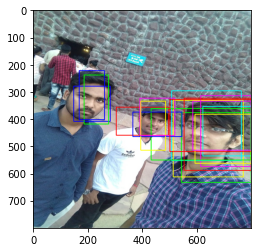

In [76]:
plot_im_box(im[0],roi[pos_index])

In [77]:
roi.shape

(2000, 4)

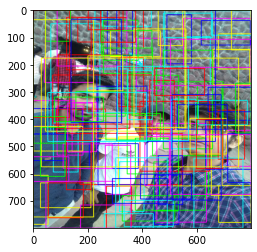

In [78]:
plot_im_box(im[0],roi[neg_index])

In [79]:
#res
# Now we gather positve samples index and negitive samples index, 
# their respective labels and region proposals

keep_index = np.append(pos_index, neg_index)
gt_roi_labels = gt_roi_label[keep_index]
gt_roi_labels[pos_roi_per_this_image:] = 0  # negative labels --> 0
sample_roi = roi[keep_index]
print(sample_roi.shape)

# Pick the ground truth objects for these sample_roi and 
# later parameterize as we have done while assigning locations to anchor boxes in section 2.
bbox_for_sampled_roi = bbox[gt_assignment[keep_index]]
print(bbox_for_sampled_roi.shape)

height = sample_roi[:, 2] - sample_roi[:, 0]
width = sample_roi[:, 3] - sample_roi[:, 1]
ctr_y = sample_roi[:, 0] + 0.5 * height
ctr_x = sample_roi[:, 1] + 0.5 * width

base_height = bbox_for_sampled_roi[:, 2] - bbox_for_sampled_roi[:, 0]
base_width = bbox_for_sampled_roi[:, 3] - bbox_for_sampled_roi[:, 1]
base_ctr_y = bbox_for_sampled_roi[:, 0] + 0.5 * base_height
base_ctr_x = bbox_for_sampled_roi[:, 1] + 0.5 * base_width

(128, 4)
(128, 4)


In [80]:
#res
eps = np.finfo(height.dtype).eps
height = np.maximum(height, eps)
width = np.maximum(width, eps)

dy = (base_ctr_y - ctr_y) / height
dx = (base_ctr_x - ctr_x) / width
dh = np.log(base_height / height)
dw = np.log(base_width / width)

gt_roi_locs = np.vstack((dy, dx, dh, dw)).transpose()
print(gt_roi_locs.shape)

(128, 4)


# 128 ROI samples features, max pooling same size, H=7, W=7 (ROI Pooling)

In [81]:
#res 
rois = np.array(sample_roi, dtype=np.float32)
roi_indices = np.zeros((len(rois),), dtype=np.float32)

print(rois.shape, roi_indices.shape)

indices_and_rois = np.concatenate([roi_indices[:, None], rois], axis=1)
xy_indices_and_rois = indices_and_rois[:, [0, 2, 1, 4, 3]]
indices_and_rois = xy_indices_and_rois
print(xy_indices_and_rois.shape)

(128, 4) (128,)
(128, 5)


In [82]:
#res
#roi pooling 
size = (7, 7)
output = npx.roi_pooling(out_map,xy_indices_and_rois, size,1.0/16.0)
kk = output.reshape(output.shape[0],-1)
kk.shape

(128, 25088)

In [83]:
#irr
#final classification
roi_head_classifier = nn.Sequential()
roi_head_classifier.add(nn.Dense(4096, activation='relu'),
                       nn.Dense(4096, activation = 'relu'))
roi_head_classifier.collect_params().initialize(init.Normal(sigma=0.01))

cls_loc = nn.Dense(10*4, activation= 'relu')
cls_loc.weight.initialize(init.Normal(sigma=0.01))
cls_loc.bias.initialize(init.Zero())
score_l = nn.Dense(10, activation = 'relu')
score_l.weight.initialize(init.Normal(sigma=0.01))
score_l.bias.initialize(init.Zero())

In [85]:
#res
kk = roi_head_classifier(kk)
roi_cls_loc = cls_loc(kk)
roi_cls_score = score_l(kk)
print(roi_cls_loc.shape, roi_cls_score.shape)

(128, 40) (128, 10)


In [87]:
#roi_cls_loc, roi_cls_score
#help(roi_head_classifier.collect_params().initialize)


In [88]:
# predicted
print(roi_cls_loc.shape)
print(roi_cls_score.shape)

#actual
print(gt_roi_locs.shape)
print(gt_roi_labels.shape)

(128, 40)
(128, 10)
(128, 4)
(128,)


In [89]:
#res
gt_roi_loc = np.array(gt_roi_locs)
gt_roi_label = np.array(gt_roi_labels, dtype = np.float32)
print(gt_roi_loc.shape, gt_roi_label.shape)

(128, 4) (128,)


In [118]:
#res
ce_loss = gluon.loss.SoftmaxCrossEntropyLoss()
roi_cls_loss= ce_loss(roi_cls_score, gt_roi_label).mean()
#roi_cls_loss = cross_entropy(roi_cls_score, gt_roi_label)
print(roi_cls_loss)

2.3311372


In [91]:
#res
#regression loss
n_sample = roi_cls_loc.shape[0]
roi_loc = roi_cls_loc.reshape(n_sample, -1,4)
print(roi_loc.shape)

roi_loc = roi_loc[np.arange(0,n_sample),gt_roi_label]
print(roi_loc.shape)

(128, 10, 4)
(128, 4)


In [92]:
#res
pos = (gt_roi_label > 0).reshape(-1,1)
mask = np.ones((pos.shape[1],4), dtype= pos.dtype)
mask = pos * mask

In [125]:
#res
mask_loc_preds = roi_loc[mask].reshape(-1, 4)
mask_loc_targets = gt_roi_loc[mask].reshape(-1, 4)

xy = np.abs(mask_loc_targets - mask_loc_preds)
roi_loc_loss = mxnet.nd.npx.smooth_l1(xy).sum()
print(x.shape, roi_loc_loss)

(17, 4) 2.9439518


In [126]:
#res
roi_lambda = 10.
roi_loss = roi_cls_loss + (roi_lambda * roi_loc_loss)
print(roi_loss)

31.770655


In [127]:
#res
total_loss = rpn_loss + roi_loss.mean()

In [128]:
total_loss

array(34.304863)

In [129]:
#help(gluon.loss.SoftmaxCrossEntropyLoss)

In [140]:
real_output_cls_score = softmax(roi_cls_score)
cc= real_output_cls_score.max(axis=1)>0.147
ccd = real_output_cls_score[cc]
ccd.shape

(3, 10)